<a href="https://colab.research.google.com/github/jtao22/PHYS-XR050/blob/main/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit, minimize
sns.set_theme(style="darkgrid")

In [ ]:
#upload 
from google.colab import files 
files.upload()

{}

#1   Ordinary Least Squares Regression:  The Greenhouse Effect

In [ ]:
data = pd.read_csv('greenhouse_emissions_by_year.csv')

In [ ]:
data.head(5)

,year,cum_em_co2_ppm,co2_atm_total_ppm,ch4_atm_total_ppb,n2o_atm_total_ppb,global_land_temp_C,global_ocean_temp_C
0,1880,2.383731,287.770000,278.2,847.480,-0.52,-0.02
1,1881,2.496821,289.333333,278.3,849.454,-0.45,0.01
2,1882,2.616259,290.896667,278.4,851.428,-0.48,0.00
3,1883,2.743275,292.460000,278.5,853.402,-0.69,-0.04
4,1884,2.871720,289.490000,278.6,855.376,-0.73,-0.14


Text(0.5, 1.0, 'Global Temp vs Total Atmospheric CO2')

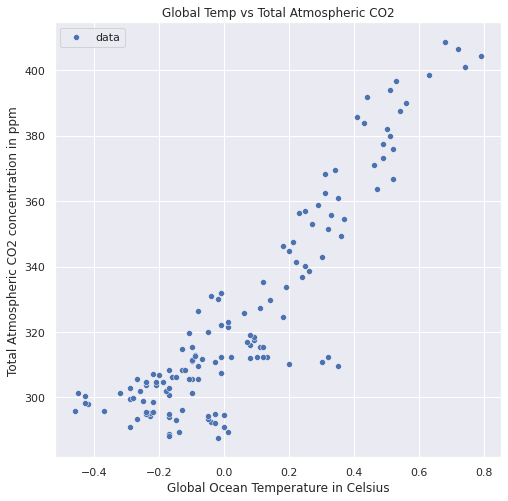

In [ ]:
#visualize
fig = plt.figure(figsize=(8,8))
plot = fig.add_subplot(1,1,1)
sns.scatterplot(x=data['global_ocean_temp_C'],y=data['co2_atm_total_ppm'],label = "data",ax=plot)
plot.set_ylabel('Total Atmospheric CO2 concentration in ppm')
plot.set_xlabel('Global Ocean Temperature in Celsius')
plot.set_title('Global Temp vs Total Atmospheric CO2')

In [ ]:
y = data['co2_atm_total_ppm'].values
x = data['global_ocean_temp_C'].values

In [ ]:
def toline(x,m,b):
  return m*x+b
param,covariance = curve_fit(toline,x,y)
print("Best fit slope: ",param[0], "+-", np.sqrt(covariance[0][0]))
print("Best fit intercept: ",param[1], "+-", np.sqrt(covariance[1][1]))

Best fit slope:  101.59759766384067 +- 4.241828696673351
Best fit intercept:  319.57658694467995 +- 1.216878870794529


In [ ]:
vmean = (1.0/len(y))*np.sum((y-np.mean(y))**2)
vfit = (1.0/len(y))*np.sum((y-(x*param[0]+param[1]))**2)
r2 = (vmean-vfit)/vmean
r2

0.8072236241563073

In [ ]:
sns.lineplot(x=x,y=x*param[0]+param[1], label = "Best fit line", ax=plot, color="red")

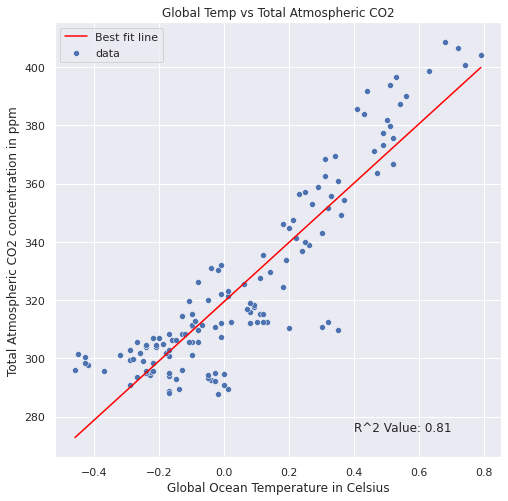

In [ ]:
plot.legend(loc="upper left")
plot.annotate("R^2 Value: 0.81",xy= (0.4,275))
fig

###Results
| \ | Best-fit Value | Uncertainty |
| --- | --- | --- |
| Slope, m | 101.60 | 4.24 |
| Intercept, b | 319.58 | 1.22 |
| R^2 | 0.81 | \ |


#2   Polynomial Fitting with Ordinary Least Squares

In [ ]:
files.upload()

{}

In [ ]:
data = pd.read_csv('least_squares.csv')

In [ ]:
data.head(5)

,x,y
0,0.027,3.096
1,0.074,1.029
2,0.161,-0.214
3,0.293,3.539
4,0.322,0.624


Text(0.5, 1.0, 'A very cool plot')

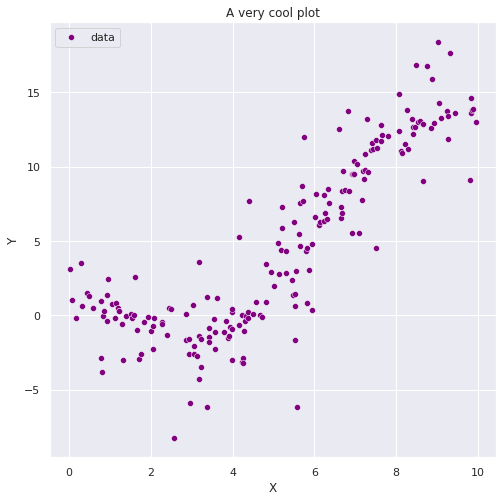

In [ ]:
#visualize
fig = plt.figure(figsize=(8,8))
plot = fig.add_subplot(1,1,1)
sns.scatterplot(x=data['x'],y=data['y'],color="purple",label = "data",ax=plot)
plot.set_ylabel('Y')
plot.set_xlabel('X')
plot.set_title('A very cool plot')

In [ ]:
y = data['y'].values
x = data['x'].values

In [ ]:
def fit(x,a,b,c,d,e):
  return a*np.cos(b*x)+c*(x**d)-e
param,covariance = curve_fit(fit,x,y)
print("Best fit params: a = %0.2f, b = %0.2f, c = %0.2f, d = %0.2f, e = %0.2f" % (param[0],param[1],param[2],param[3],param[4]))

Best fit params: a = 2.58, b = 0.81, c = 0.39, d = 1.63, e = 1.96


In [ ]:
vmean = (1.0/len(y))*np.sum((y-np.mean(y))**2)
vfit = (1.0/len(y))*np.sum((y-(param[0]*np.cos(param[1]*x)+param[2]*(x**param[3])-param[4]))**2)
r2 = (vmean-vfit)/vmean
r2

0.8569768409511506

In [ ]:
sns.lineplot(x=x,y=(param[0]*np.cos(param[1]*x)+param[2]*(x**param[3])-param[4]), label = "Best fit line", ax=plot, color="red")

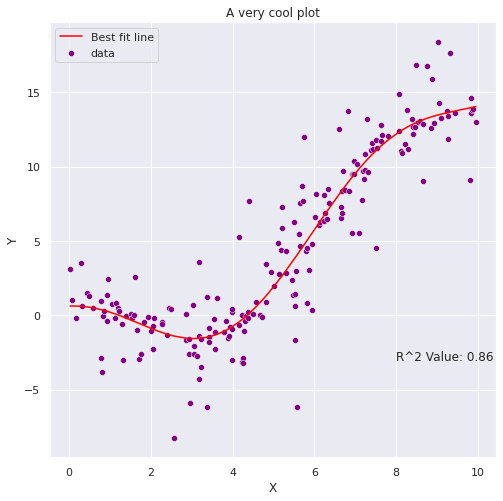

In [ ]:
plot.legend(loc ="upper left") 
plot.annotate("R^2 Value: 0.86",xy= (8,-3))
fig

In [ ]:
for i in range(5):
  print(np.sqrt(covariance[i][i]))


0.4110388329244527
0.03635709233739912
0.3206961994079331
0.3726432115743828
0.7748652212623413


###Results
| \ | Best-fit Value | Uncertainty |
| --- | --- | --- |
| a | 2.58 | 0.41 |
| b | 0.81 | 0.04 |
| c | 0.39 | 0.32 |
| d | 1.63 | 0.37 |
| e | 1.96 | 0.77 |
| R^2 | 0.86 | \ |


#3   Maximum Likelihood Fitting

In [ ]:
files.upload()

{}

In [ ]:
data = pd.read_csv('max_like.csv')

In [ ]:
data.head(5)

,x,y,dy
0,4400.0,-1.48158,-1.49045
1,4401.0,-1.58620,-1.59510
2,4402.0,-0.94817,-0.95711
3,4403.0,1.60136,1.59238
4,4404.0,-0.22709,-0.23611


Text(0.5, 1.0, 'A very cool plot')

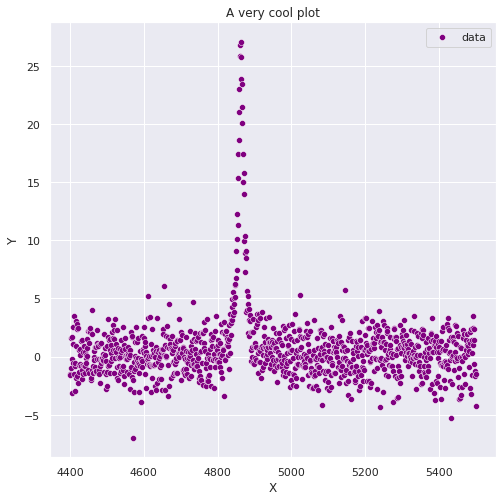

In [ ]:
#real plot
fig = plt.figure(figsize=(8,8))
plot = fig.add_subplot(1,1,1)
sns.scatterplot(x=data['x'],y=data['y'], label="data",color="purple",ax=plot) 
plot.set_ylabel('Y')
plot.set_xlabel('X')
plot.set_title('A very cool plot')

Text(0.5, 1.0, 'A very cool plot')

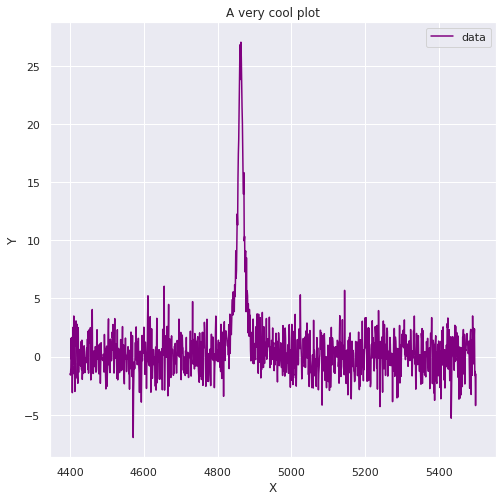

In [ ]:
#line plot
fig = plt.figure(figsize=(8,8))
plot = fig.add_subplot(1,1,1)
sns.lineplot(x=data['x'],y=data['y'],color="purple", label="data",ax=plot) #this as well as the example given in the pdf are line plots, I graphed this just in case
plot.set_ylabel('Y')
plot.set_xlabel('X')
plot.set_title('A very cool plot')

In [ ]:
x = data['x'].values
y = data['y'].values
dy = data['dy'].values

In [ ]:
#Disregard
def fit( x, A, FWHM,x0):
    return A*(FWHM/2)**2/((FWHM/2)**2+(x-x0)**2)
param,covariance = curve_fit(fit,x,y)
print("Best-fit Lorentzian parameters: A = %0.2f, gamma = %0.2f, x0 = %0.2f" %(param[0],param[1]/2,param[2]))

Best-fit Lorentzian parameters: A = 1088.49, gamma = 201.87, x0 = -3123.51


In [ ]:
def maxlike(theta,x,y,dy):
  A, FWHM, x0 = theta
  gamma = FWHM/2
  model = A*(gamma)**2/((gamma)**2+(x-x0)**2)
  return -0.5*np.sum(np.log(2*np.pi*(dy**2))+(((y-model)**2)/(dy**2)))
def func(*args):
  return -maxlike(*args)

results = minimize(func, [20.0, 20.0, 4700.0], args=(x, y, dy))
A,FWHM,x0 = results["x"]
gamma = FWHM/2
print("Best-fit Lorentzian parameters: A = %0.2f, gamma = %0.2f, x0 = %0.2f" %(A,gamma,x0))

Best-fit Lorentzian parameters: A = 25.18, gamma = 8.66, x0 = 4862.00


In [ ]:
vmean = (1.0/len(y))*np.sum((y-np.mean(y))**2)
vfit = (1.0/len(y))*np.sum((y-(A*(gamma)**2/((gamma)**2+(x-x0)**2)))**2)
r2 = (vmean-vfit)/vmean
r2

0.7555269819619598

In [ ]:
sns.lineplot(x=x,y=A*(gamma)**2/((gamma)**2+(x-x0)**2)
, label="Best Fit Line",color="red",ax=plot) 


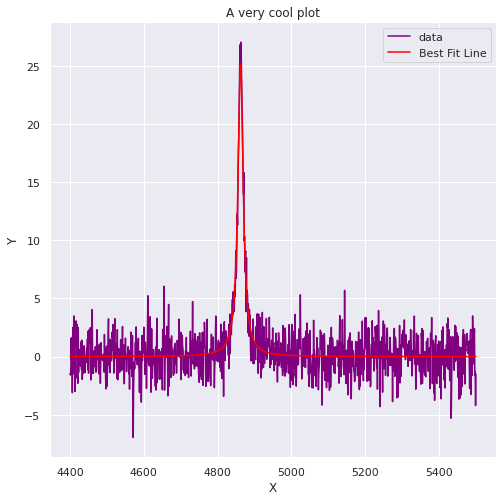

In [ ]:
fig

In [ ]:
plot.legend(loc ="upper left") 
plot.annotate("R^2 Value: 0.76",xy=(5200,25))

Text(5200, 25, 'R^2 Value: 0.76')

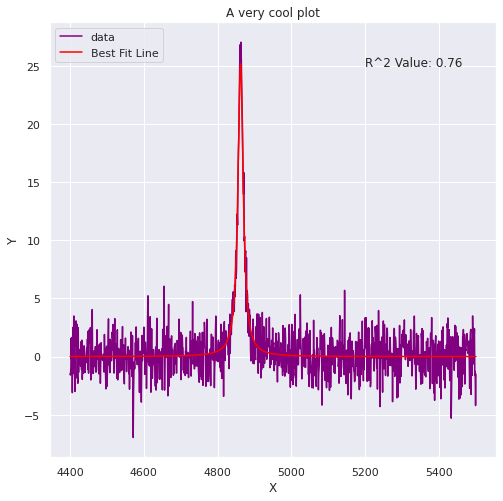

In [ ]:
fig